In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use(['science','notebook'])
cmap = cm.inferno
import scipy as sp
from scipy.integrate import quad

# Tutorial: Streamplots, quiverplots, colorplots

Consider a current loop with current $I$ given by $z=0$, $x=a\cos\theta$ and $y = a \sin\theta$ travelling in the standard counter-clockwise position in the $xy$ plane. 

a) Plot $B_x$ and $B_y$ on the planes $z=-a/2$, $z=-a/4$, $z=a/4$ and $z=a/2$. Use a quiver plot. On the same axes, plot a heat plot of $B_z$. Based on the plot, are the results consistent with Griffiths Figure 5.55 for a "Physical" dipole?

In [131]:
def integrandx(t, x_a, y_a, z_a):
    return z_a * np.cos(t) / ((x_a-np.cos(t))**2+(y_a-np.sin(t))**2+(z_a)**2)**(3/2)
def integrandy(t, x_a, y_a, z_a):
    return z_a * np.sin(t) / ((x_a-np.cos(t))**2+(y_a-np.sin(t))**2+(z_a)**2)**(3/2)
def integrandz(t, x_a, y_a, z_a):
    return (-np.sin(t)*(y_a-np.sin(t)) - np.cos(t)*(x_a-np.cos(t))) / ((x_a-np.cos(t))**2+(y_a-np.sin(t))**2+(z_a)**2)**(3/2)

def Bx(x_a, y_a, z_a):
    return quad(integrandx, 0, 2*np.pi, args=(x_a, y_a, z_a))[0] 
def By(x_a, y_a, z_a):
    return quad(integrandy, 0, 2*np.pi, args=(x_a, y_a, z_a))[0] 
def Bz(x_a, y_a, z_a):
    return quad(integrandz, 0, 2*np.pi, args=(x_a, y_a, z_a))[0] 

Meshgrid for heat map

In [132]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(x, y)

Meshgrid for quiver plots.

In [133]:
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
xd, yd = np.meshgrid(x, y)

Get $B_z$ using heatmap meshgrid.

In [134]:
mag_field_z1 = np.vectorize(Bz)(xv, yv, -0.5)
mag_field_z2 = np.vectorize(Bz)(xv, yv, -0.25)
mag_field_z3 = np.vectorize(Bz)(xv, yv, 0.25)
mag_field_z4 = np.vectorize(Bz)(xv, yv, 0.5)

Get $B_x$ and $B_y$ using quiver meshgrids.

In [135]:
mag_field_x1 = np.vectorize(Bx)(xd, yd, -0.5)
mag_field_y1 = np.vectorize(By)(xd, yd, -0.5)
mag_field_x2 = np.vectorize(Bx)(xd, yd, -0.25)
mag_field_y2 = np.vectorize(By)(xd, yd, -0.25)
mag_field_x3 = np.vectorize(Bx)(xd, yd, 0.25)
mag_field_y3 = np.vectorize(By)(xd, yd, 0.25)
mag_field_x4 = np.vectorize(Bx)(xd, yd, 0.5)
mag_field_y4 = np.vectorize(By)(xd, yd, 0.5)

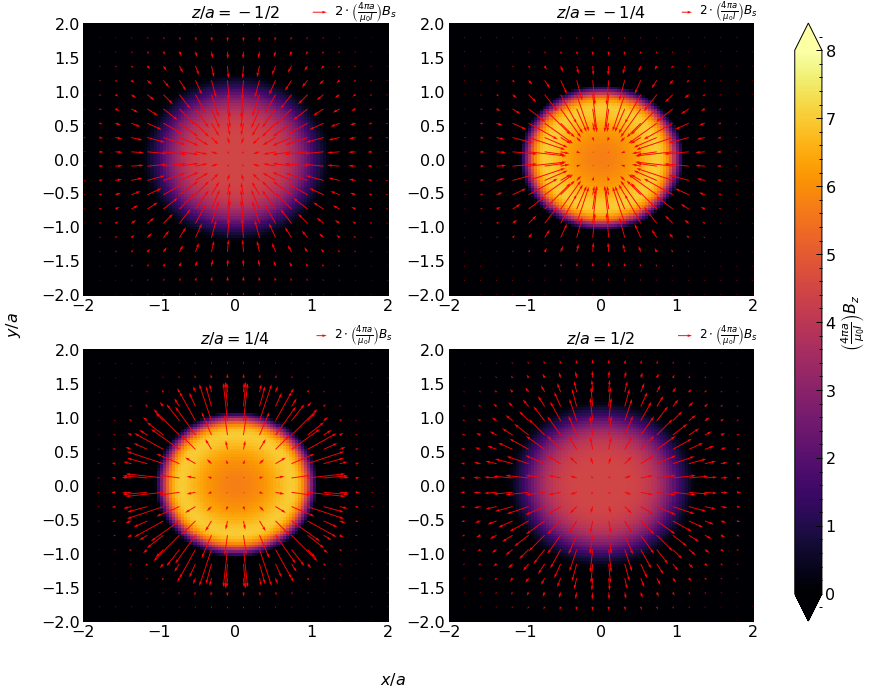

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(15,11))

ax = axes[0,0]
cs = ax.pcolor(xv, yv, mag_field_z1, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x1, mag_field_y1, units='width', color='r')
ax.set_title('$z/a = -1/2$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':13})

ax = axes[0,1]
cs = ax.pcolor(xv, yv, mag_field_z2, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x2, mag_field_y2, units='width', color='r')
ax.set_title('$z/a = -1/4$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

ax = axes[1,0]
cs = ax.pcolor(xv, yv, mag_field_z3, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x3, mag_field_y3, units='width', color='r')
ax.set_title('$z/a = 1/4$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

ax = axes[1,1]
cs = ax.pcolor(xv, yv, mag_field_z4, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x4, mag_field_y4, units='width', color='r')
ax.set_title('$z/a = 1/2$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})


cbar = fig.colorbar(cs, ax=axes, extend='both', label=r'$\left( \frac{4 \pi a}{\mu_0 I} \right)B_z$')
fig.text(0.4, 0.045, '$x/a$', fontsize=16)
fig.text(0.06, 0.5, '$y/a$', ha='center', va='center', rotation='vertical', fontsize=16)
#fig.tight_layout()
plt.savefig('mag_field.png', dpi=200)
plt.show()

In [142]:
x = np.linspace(-2, 2, 40)
z = np.linspace(-2, 2, 40)
xd, zd = np.meshgrid(x, z)
mag_field_x = np.vectorize(Bx)(xd, 0, zd)
mag_field_z = np.vectorize(Bz)(xd, 0, zd)

Text(0.5, 1.0, 'Magnetic Field Lines')

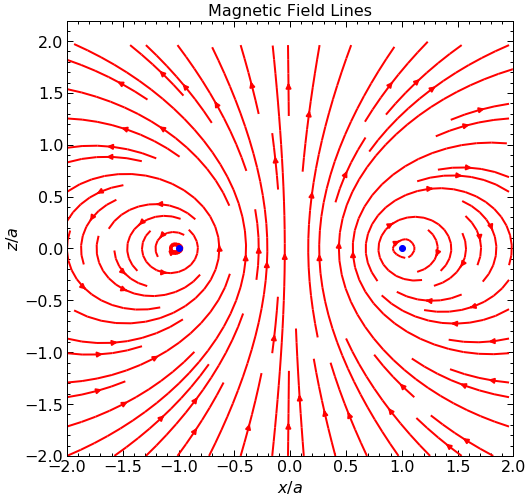

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

Q = ax.streamplot(xd, zd, mag_field_x, mag_field_z, color='r')
ax.scatter([-1], [0], color='blue', zorder=100)
ax.scatter([1], [0], color='blue', zorder=100)
ax.set_xlabel('$x/a$')
ax.set_ylabel('$z/a$')
ax.set_title('Magnetic Field Lines')

# Assignment

## Question

Consider the following closed loop carrying current $I$ consisting of the following two segments in the $xy$ plane:

* $z=0$; &nbsp;&nbsp;&nbsp;&nbsp;    $-a \leq x \leq a$; &nbsp;&nbsp;&nbsp;&nbsp;  $y=\frac{a}{2}\cos(3 \pi x/a)$
* $z=0$; &nbsp;&nbsp;&nbsp;&nbsp;    $y\leq -\frac{a}{2}$; &nbsp;&nbsp;&nbsp;&nbsp;  $x^2 + (y-a/2)^2 = a^2$

The current flows in the standard counter-clockwise direction in the $xy$ plane.

a) Plot $B_x$ and $B_y$ on the planes $z=-a/2$, $z=-a/4$, $z=a/4$ and $z=a/2$. Use a quiver plot. On the same axes, plot a heat plot of $B_z$.

b) Consider the amperian loops $\vec{r}' = <\frac{an}{3} \cos(t)-a, 0, \frac{an}{3}\sin(t)>$ for $0 \leq t \leq 2\pi$ and the cases $n=1,2,3,4,5,6$. (These are circles of radius $n\frac{a}{3}$ in the plane $y=0$ centered at $(x,z)=(-a,0)$). Plot $\frac{1}{\mu_0 I}\oint \vec{B} \cdot d\vec{r}$ vs. $n$. Are the results what you expect based on Amperes law?

## Answer

In [2]:
def integrandx1(t, x_a, y_a, z_a):
    return (-3*np.pi/2)*np.sin(3*np.pi*t)*z_a/((x_a-t)**2+(y_a-0.5*np.cos(3*np.pi*t))**2+(z_a)**2)**(3/2)
def integrandx2(t, x_a, y_a, z_a):
    return np.cos(t)*z_a/((x_a-np.cos(t))**2+(y_a-np.sin(t)+0.5)**2+(z_a)**2)**(3/2)
def integrandy1(t, x_a, y_a, z_a):
    return -z_a/((x_a-t)**2+(y_a-0.5*np.cos(3*np.pi*t))**2+(z_a)**2)**(3/2)
def integrandy2(t, x_a, y_a, z_a):
    return np.sin(t)*z_a/((x_a-np.cos(t))**2+(y_a-np.sin(t)+0.5)**2+(z_a)**2)**(3/2)
def integrandz1(t, x_a, y_a, z_a):
    return ((y_a-0.5*np.cos(3*np.pi*t))+((x_a-t)*(3*np.pi/2)*np.sin(3*np.pi*t))) \
            /((x_a-t)**2+(y_a-0.5*np.cos(3*np.pi*t))**2+(z_a)**2)**(3/2)
def integrandz2(t, x_a, y_a, z_a):
    return (-np.sin(t)*(y_a-np.sin(t)+0.5)-(x_a-np.cos(t))*np.cos(t)) \
            /((x_a-np.cos(t))**2+(y_a-np.sin(t)+0.5)**2+(z_a)**2)**(3/2)

def Bx(x_a, y_a, z_a):
    return quad(integrandx1, 1, -1, args=(x_a, y_a, z_a))[0] \
        + quad(integrandx2, -np.pi, 0, args=(x_a, y_a, z_a))[0]
def By(x_a, y_a, z_a):
    return quad(integrandy1, 1, -1, args=(x_a, y_a, z_a))[0] \
        + quad(integrandy2, -np.pi, 0, args=(x_a, y_a, z_a))[0]
def Bz(x_a, y_a, z_a):
    return quad(integrandz1, 1, -1, args=(x_a, y_a, z_a))[0] \
        + quad(integrandz2, -np.pi, 0, args=(x_a, y_a, z_a))[0]

Meshgrid for heat map

In [4]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(x, y)

Meshgrid for quiver plots.

In [10]:
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
xd, yd = np.meshgrid(x, y)

Get heat map for $B_z$ using heatmap meshgrid.

In [35]:
mag_field_z1 = np.vectorize(Bz)(xv, yv, -0.5)
mag_field_z2 = np.vectorize(Bz)(xv, yv, -0.25)
mag_field_z3 = np.vectorize(Bz)(xv, yv, 0.25)
mag_field_z4 = np.vectorize(Bz)(xv, yv, 0.5)

Get quiver plots for $B_x$ and $B_y$ using quiver meshgrids.

In [ ]:
mag_field_x1 = np.vectorize(Bx)(xd, yd, -0.5)
mag_field_y1 = np.vectorize(By)(xd, yd, -0.5)
mag_field_x2 = np.vectorize(Bx)(xd, yd, -0.25)
mag_field_y2 = np.vectorize(By)(xd, yd, -0.25)
mag_field_x3 = np.vectorize(Bx)(xd, yd, 0.25)
mag_field_y3 = np.vectorize(By)(xd, yd, 0.25)
mag_field_x4 = np.vectorize(Bx)(xd, yd, 0.5)
mag_field_y4 = np.vectorize(By)(xd, yd, 0.5)

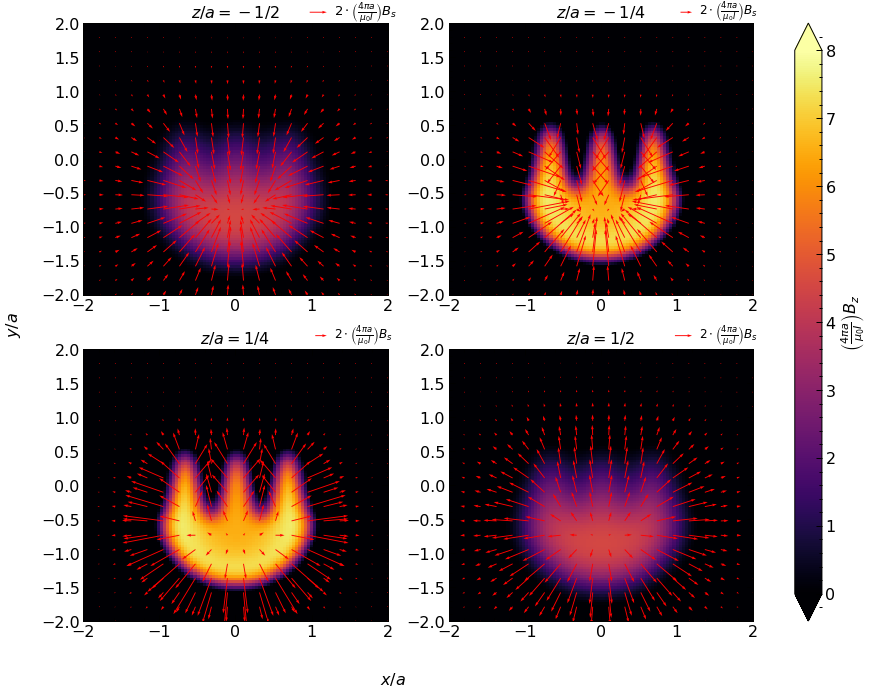

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(15,11))

ax = axes[0,0]
cs = ax.pcolor(xv, yv, mag_field_z1, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x1, mag_field_y1, units='width', color='r')
ax.set_title('$z/a = -1/2$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':13})

ax = axes[0,1]
cs = ax.pcolor(xv, yv, mag_field_z2, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x2, mag_field_y2, units='width', color='r')
ax.set_title('$z/a = -1/4$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

ax = axes[1,0]
cs = ax.pcolor(xv, yv, mag_field_z3, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x3, mag_field_y3, units='width', color='r')
ax.set_title('$z/a = 1/4$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

ax = axes[1,1]
cs = ax.pcolor(xv, yv, mag_field_z4, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xd, yd, mag_field_x4, mag_field_y4, units='width', color='r')
ax.set_title('$z/a = 1/2$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})


cbar = fig.colorbar(cs, ax=axes, extend='both', label=r'$\left( \frac{4 \pi a}{\mu_0 I} \right)B_z$')
fig.text(0.4, 0.045, '$x/a$', fontsize=16)
fig.text(0.06, 0.5, '$y/a$', ha='center', va='center', rotation='vertical', fontsize=16)
#fig.tight_layout()
plt.savefig('mag_field.png', dpi=200)
plt.show()

Now check Ampere's law

In [66]:
def integrand(t, n):
    return Bx((n/3)*np.cos(t)-1, 0, (n/3)*np.sin(t))*((-n/3)*np.sin(t)) \
        +  Bz((n/3)*np.cos(t)-1, 0, (n/3)*np.sin(t))*((n/3)*np.cos(t))
def ampere(n):
    return 1/(4*np.pi)*quad(integrand, 0, 2*np.pi, args=(n))[0] 

In [76]:
ns = np.arange(1, 7, 1)
ampere_loops = np.vectorize(ampere)(ns)

Text(0.5, 1.0, 'Amperian Loop Integral vs. Loop radius $na/3$')

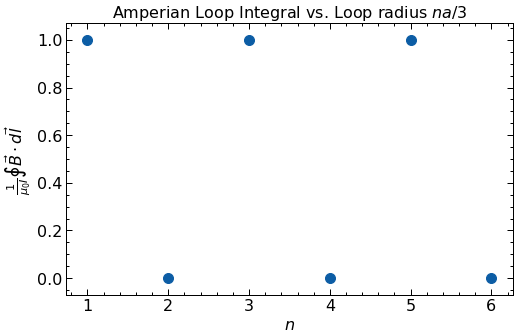

In [77]:
plt.subplots(figsize=(8,5))
plt.scatter(ns, ampere_loops, s=100)
plt.xlabel('$n$')
plt.ylabel(r'$ \frac{1}{\mu_0 I} \oint \vec{B} \cdot d\vec{l}$')
plt.title('Amperian Loop Integral vs. Loop radius $na/3$' )